In [ ]:
# Ejecutar una vez 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# NLP
import spacy
import gensim

# WordCloud
from wordcloud import WordCloud

# Twitter y emojis
from twitter_text import extract_urls #Aqui es con text_parser para que funcione
import twitter_text as twt  # opcional si necesitas otras funciones del módulo
import emoji

# Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# NLTK
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



## Generar una nube de palabras con los términos más frecuentes aparecidos en una búsqueda en Tweeter

# 1. Cargar los tweets

In [ ]:
# Importar tweets en inglés y filtrar por label1
df= pd.read_csv("../EnTrainTask12.csv",encoding='UTF8')
en_tr_lines_yes = df[df['label1'] == 'YES']['text'].dropna().tolist()
en_tr_lines_no = df[df['label1'] == 'NO']['text'].dropna().tolist()


# Importar tweets en español y filtrar por label1
df = pd.read_csv("../SpTrainTask12.csv", encoding='UTF-8')

sp_tr_lines_yes = df[df['label1'] == 'YES']['text'].dropna().tolist()
sp_tr_lines_no  = df[df['label1'] == 'NO']['text'].dropna().tolist()

# 2. Tokenizar los tweets

In [ ]:
# Transforma texto en lista de palabras limpias
def tk_er(t):
  t = re.sub('\W+', ' ', t.lower())
  tks = t.split()
  return (tks)


# Función de tokenizar de tweets
def mi_tokenizador(texto):

    '''
    urls = twt.extract_urls_with_indices(texto)
    for i in range(len(urls)-1,-1,-1):
        start, end = urls[i]['indices']
        texto = texto[:start] + texto[end:]
    '''
    urls = twt.extract_urls(texto, extract_urls_without_protocol = True)
    for url in urls:
        texto = texto.replace(url,'')
        #print(texto)
    
    # extraer emojis
    '''
    emos = twt.extract_emojis_with_indices(texto)
    for i in range(len(emos)-1,-1,-1):
        start, end = emos[i]['indices']
        texto = texto[:start] + texto[end:]
    '''
    texto = emoji.replace_emoji(texto, replace='') # elimina emojis
    
    # texto tokenizado --> lo ponemos en minúsculas, quitamos repeticiones y menciones
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens2 = tknzr.tokenize(texto)
    
    tokens2 = tk_er(' '.join(tokens2))

    return tokens2

In [ ]:
# Función de limpiar tweets
def mi_limpiador(texto):
    # Extraer URLs
    #print(f'mi texto: {texto}')
    urls = twt.extract_urls(texto, extract_urls_without_protocol = False)
    for url in urls:
        texto = texto.replace(url,'')

    
    # Extraer emojis
    texto = emoji.replace_emoji(texto, replace='')

    # Extraer hashtags
    hashtags = re.findall(r'#\w+', texto)
    for ht in hashtags:
        texto = texto.replace(ht, '')

    # Extraer menciones
    menciones = re.findall(r'@\w+', texto)
    for m in menciones:
        texto = texto.replace(m, '')
        

    texto = re.sub('\W+', ' ', texto.lower())

    # Extraer números (enteros o decimales)
    numeros = re.findall(r'\b\d+(?:\.\d+)?\b', texto)
    for n in numeros:
        texto = texto.replace(n, 'NUMBER')

    # Limpiar espacios sobrantes
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    return texto

In [ ]:
# --- INGLÉS ---
en_total_tweets_yes = []
for tweet in en_tr_lines_yes:
    en_total_tweets_yes.append(mi_limpiador(tweet))


en_total_tweets_no = []
for tweet in en_tr_lines_no:
    en_total_tweets_no.append(mi_limpiador(tweet))


# --- ESPAÑOL ---
sp_total_tweets_yes = []
for tweet in sp_tr_lines_yes:
    sp_total_tweets_yes.append(mi_limpiador(tweet))

sp_total_tweets_no = []
for tweet in sp_tr_lines_no:
    sp_total_tweets_no.append(mi_limpiador(tweet))


#### 4.1 Generar una nube de palabras básica:

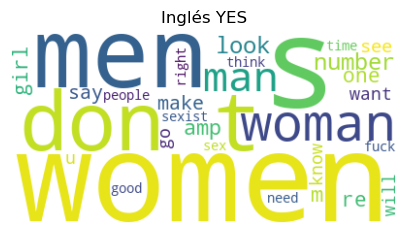

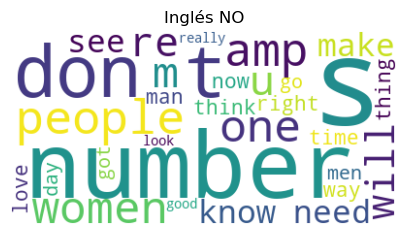

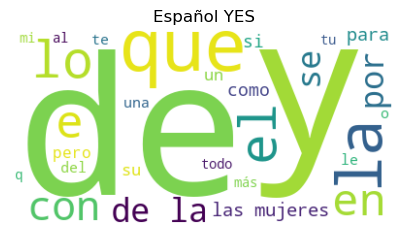

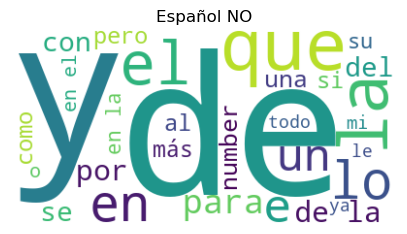

In [38]:
img = Image.open('fondo.png') # Circle.
back_mask = np.array(img)

# --- Función para generar nube de palabras ---
def generar_nube(tokens, mask=None, max_words=30, title=""):
    wc = WordCloud(background_color='white', max_words=max_words, mask=mask)
    wc.generate(' '.join(tokens))
    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# TOKENIZAR LAS 4 LISTAS


tokens_en_yes = tk_er(" ".join(en_total_tweets_yes))
tokens_en_no  = tk_er(" ".join(en_total_tweets_no))
tokens_sp_yes = tk_er(" ".join(sp_total_tweets_yes))
tokens_sp_no  = tk_er(" ".join(sp_total_tweets_no))

generar_nube(tokens_en_yes, title="Inglés YES")
generar_nube(tokens_en_no, title="Inglés NO")
generar_nube(tokens_sp_yes, title="Español YES")
generar_nube(tokens_sp_no, title="Español NO")


#### 4.2 Generar una nube de palabras utilizando una máscara:

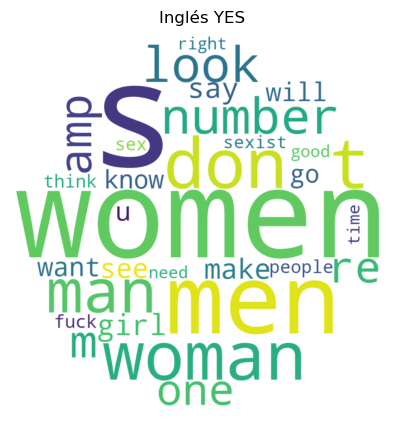

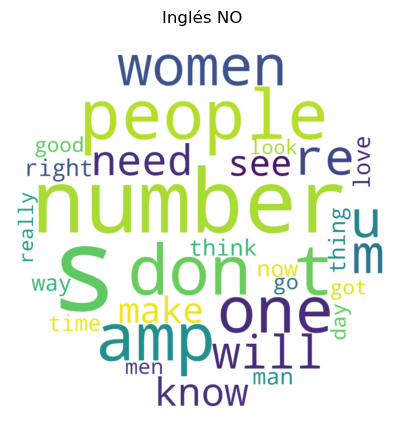

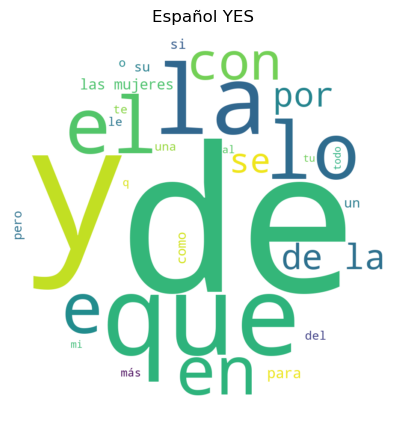

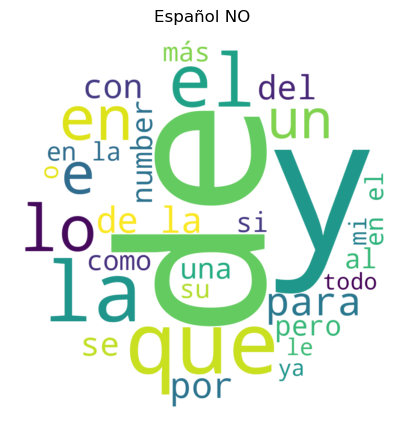

In [ ]:

# GENERAR LAS 4 NUBES

generar_nube(tokens_en_yes, mask=back_mask, title="Inglés YES")
generar_nube(tokens_en_no,  mask=back_mask, title="Inglés NO")
generar_nube(tokens_sp_yes, mask=back_mask, title="Español YES")
generar_nube(tokens_sp_no,  mask=back_mask, title="Español NO")

## 4. Elimina las stop words y vuelve a generar la nube de palabras

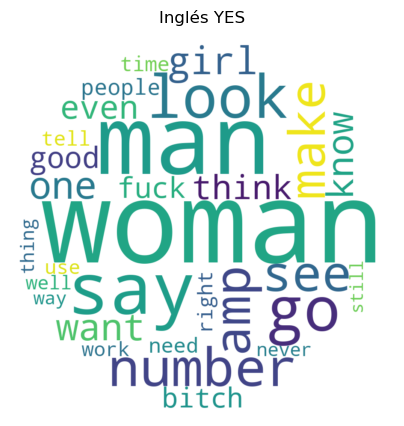

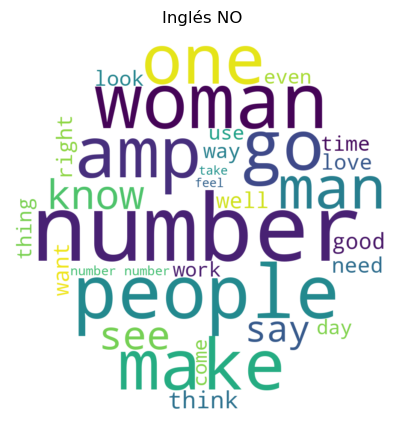

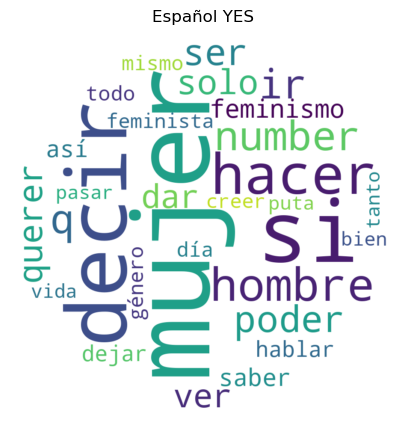

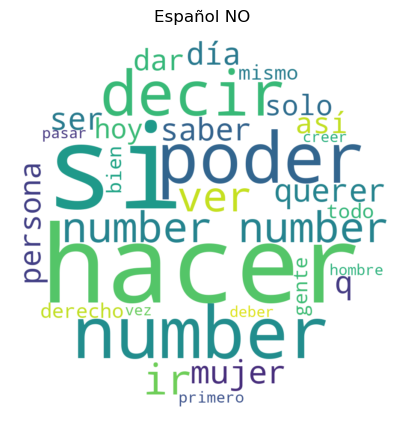

In [ ]:
# Cargar stopwords
stop_en = set(stopwords.words("english"))
stop_sp = set(stopwords.words("spanish"))


# --- Cargar modelos de spaCy ---
nlp_en = spacy.load("en_core_web_sm")
nlp_sp = spacy.load("es_core_news_sm")

# FILTRAR Y GUARDAR EN LISTAS SEPARADAS

# --- INGLÉS YES ---
tokens_en_yes_filtrados = [t for t in tokens_en_yes if t.lower() not in stop_en]
doc_en_yes = nlp_en(" ".join(tokens_en_yes_filtrados))
tokens_en_yes_lema = [token.lemma_ for token in doc_en_yes if token.lemma_.isalpha()]

# --- INGLÉS NO ---
tokens_en_no_filtrados = [t for t in tokens_en_no if t.lower() not in stop_en]
doc_en_no = nlp_en(" ".join(tokens_en_no_filtrados))
tokens_en_no_lema = [token.lemma_ for token in doc_en_no if token.lemma_.isalpha()]

# --- ESPAÑOL YES ---
tokens_sp_yes_filtrados = [t for t in tokens_sp_yes if t.lower() not in stop_sp]
doc_sp_yes = nlp_sp(" ".join(tokens_sp_yes_filtrados))
tokens_sp_yes_lema = [token.lemma_ for token in doc_sp_yes if token.lemma_.isalpha()]

# --- ESPAÑOL NO ---
tokens_sp_no_filtrados = [t for t in tokens_sp_no if t.lower() not in stop_sp]
doc_sp_no = nlp_sp(" ".join(tokens_sp_no_filtrados))
tokens_sp_no_lema = [token.lemma_ for token in doc_sp_no if token.lemma_.isalpha()]



# --- IMPRIMIR NUBES DE PALABRAS PARA TODOS LOS CONJUNTOS ---

generar_nube(tokens_en_yes_lema, mask=back_mask, title="Inglés YES")
generar_nube(tokens_en_no_lema,  mask=back_mask, title="Inglés NO")
generar_nube(tokens_sp_yes_lema, mask=back_mask, title="Español YES")
generar_nube(tokens_sp_no_lema,  mask=back_mask, title="Español NO")


## Generar la nube de palabras para el libro "book_three_little_pigs.txt", únicamente para las palabras del texto que sean Nombres

In [39]:
import nltk
from nltk import word_tokenize, pos_tag


nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [59]:
with open('book_three_little_pigs.txt', "r", encoding="utf-8") as f:
    contenido = f.read()
  
resul=mi_tokenizador(contenido)
tokens_etiquetados = pos_tag(resul, tagset='universal')
tokens_etiquetados


[('there', 'DET'),
 ('was', 'VERB'),
 ('an', 'DET'),
 ('old', 'ADJ'),
 ('sow', 'NOUN'),
 ('with', 'ADP'),
 ('three', 'NUM'),
 ('little', 'ADJ'),
 ('pigs', 'NOUN'),
 ('and', 'CONJ'),
 ('as', 'ADP'),
 ('she', 'PRON'),
 ('had', 'VERB'),
 ('not', 'ADV'),
 ('enough', 'ADV'),
 ('to', 'PRT'),
 ('keep', 'VERB'),
 ('them', 'PRON'),
 ('she', 'PRON'),
 ('sent', 'VERB'),
 ('them', 'PRON'),
 ('out', 'PRT'),
 ('to', 'PRT'),
 ('seek', 'VERB'),
 ('their', 'PRON'),
 ('fortune', 'NOUN'),
 ('the', 'DET'),
 ('first', 'ADJ'),
 ('that', 'DET'),
 ('went', 'VERB'),
 ('off', 'PRT'),
 ('met', 'VERB'),
 ('a', 'DET'),
 ('man', 'NOUN'),
 ('with', 'ADP'),
 ('a', 'DET'),
 ('bundle', 'NOUN'),
 ('of', 'ADP'),
 ('straw', 'NOUN'),
 ('and', 'CONJ'),
 ('said', 'VERB'),
 ('to', 'PRT'),
 ('him', 'PRON'),
 ('please', 'VERB'),
 ('man', 'NOUN'),
 ('give', 'VERB'),
 ('me', 'PRON'),
 ('that', 'ADP'),
 ('straw', 'VERB'),
 ('to', 'PRT'),
 ('build', 'VERB'),
 ('a', 'DET'),
 ('house', 'NOUN'),
 ('which', 'DET'),
 ('the', 'DET'),
 ('

In [60]:
valores_noun=list()
for palabrita , etiqueta in tokens_etiquetados:
    if etiqueta == 'NOUN':
        valores_noun.append((palabrita,etiqueta))
        
valores_noun

[('sow', 'NOUN'),
 ('pigs', 'NOUN'),
 ('fortune', 'NOUN'),
 ('man', 'NOUN'),
 ('bundle', 'NOUN'),
 ('straw', 'NOUN'),
 ('man', 'NOUN'),
 ('house', 'NOUN'),
 ('man', 'NOUN'),
 ('pig', 'NOUN'),
 ('house', 'NOUN'),
 ('wolf', 'NOUN'),
 ('door', 'NOUN'),
 ('pig', 'NOUN'),
 ('pig', 'NOUN'),
 ('hair', 'NOUN'),
 ('chiny', 'NOUN'),
 ('chin', 'NOUN'),
 ('wolf', 'NOUN'),
 ('huff', 'NOUN'),
 ('i', 'NOUN'),
 ('puff', 'NOUN'),
 ('i', 'NOUN'),
 ('house', 'NOUN'),
 ('house', 'NOUN'),
 ('pig', 'NOUN'),
 ('pig', 'NOUN'),
 ('man', 'NOUN'),
 ('bundle', 'NOUN'),
 ('furze', 'NOUN'),
 ('please', 'NOUN'),
 ('man', 'NOUN'),
 ('furze', 'NOUN'),
 ('house', 'NOUN'),
 ('man', 'NOUN'),
 ('pig', 'NOUN'),
 ('house', 'NOUN'),
 ('wolf', 'NOUN'),
 ('pig', 'NOUN'),
 ('hair', 'NOUN'),
 ('chiny', 'NOUN'),
 ('chin', 'NOUN'),
 ('chin', 'NOUN'),
 ('huff', 'NOUN'),
 ('i', 'NOUN'),
 ('puff', 'NOUN'),
 ('i', 'NOUN'),
 ('house', 'NOUN'),
 ('house', 'NOUN'),
 ('pig', 'NOUN'),
 ('pig', 'NOUN'),
 ('man', 'NOUN'),
 ('load', 'NOUN'),


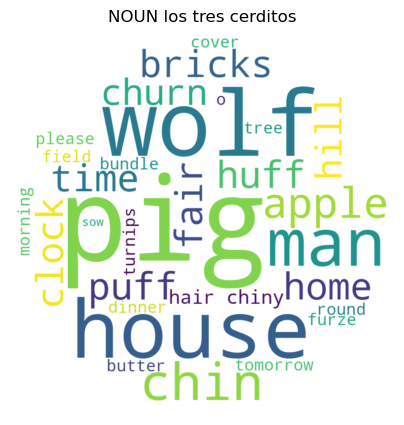

In [61]:
generar_nube([palabrita for palabrita, etiqueta in valores_noun], mask=back_mask, title="NOUN los tres cerditos")